### Dataset

In [1]:
# SMSSpamCollection
# Location: https://mitu.co.in/dataset

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read file

In [3]:
df= pd.read_csv('SMSSpamCollection',sep='\t',names=['label','text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.shape

(5572, 2)

In [5]:
df.loc[3,'text']

'U dun say so early hor... U c already then say...'

#### Seperate input and output data

In [6]:
#input 
x= df['text']

#output
y= df['label']

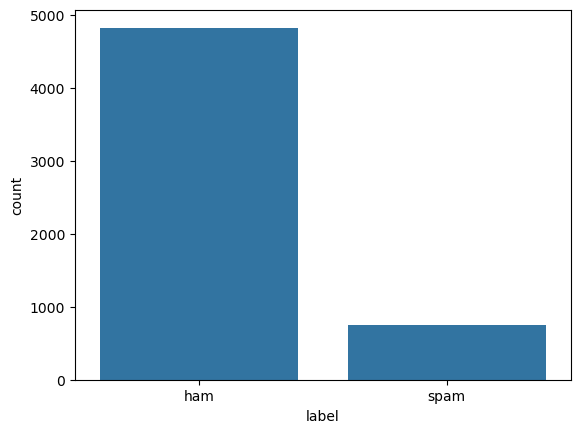

In [7]:
#Countplot
sns.countplot(x=y);

In [8]:
y.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x29f21119690>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59%'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41%')])

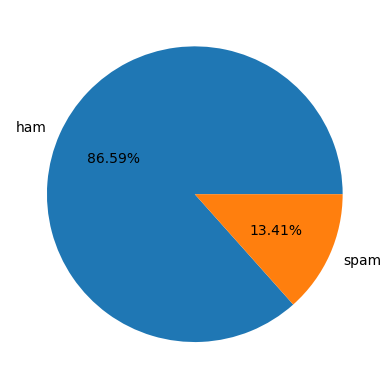

In [9]:
plt.pie(y.value_counts(), labels = y.value_counts().index, autopct='%2.2f%%')

In [ ]:
pip install pip -U

In [ ]:
pip install pillow wordcloud -U

## Filtered spam and not spam

In [ ]:
spam=x[y=='spam']
not_spam= x[y=='ham']

In [ ]:
spam.shape

In [ ]:
not_spam.shape

In [ ]:
#spam.str.cat(sep=' ')
spam=' '.join(spam)
not_spam=' '.join(not_spam)

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc_notspam= WordCloud(font_path='calibri.ttf',
              background_color='white',
             max_words=100).generate(not_spam)
plt.figure(figsize=(16,9))
plt.imshow(wc_notspam)

In [ ]:
wc_spam= WordCloud(font_path='calibri.ttf',
              background_color='white',
             max_words=100).generate(spam)
plt.figure(figsize=(16,9))
plt.imshow(wc_spam)

In [ ]:
wc_spam.words_

### Prepare the data

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
sent= 'Hello friends! How are you? I like Python Programming'

In [ ]:
#Tokenize the text
tokens1= word_tokenize(sent)

In [ ]:
tokens1

In [ ]:
## 2. Remove the punctuations
tokens2= [token for token in tokens1 if token.isalnum()]

In [ ]:
tokens2

In [ ]:
##3. Remove the stop words
swords= stopwords.words('english')

In [ ]:
tokens3= [token for token in tokens2 if token.lower() not in swords]

In [ ]:
tokens3

In [ ]:
##4. remove the suffixes
ps= PorterStemmer()
tokens4=[ps.stem(token) for token in tokens3]
tokens4

In [ ]:
# define analyzer function
def clean_txt(sent):
    #Tokenize the text
    tokens1= word_tokenize(sent)
    ## 2. Remove the punctuations
    tokens2= [token for token in tokens1 if token.isalnum()]
    ##3. Remove the stop words
    tokens3= [token for token in tokens2 if token.lower() not in swords]
    ##4. remove the suffixes
    tokens4=[ps.stem(token) for token in tokens3]
    return tokens4

In [ ]:
clean_txt(sent)

In [ ]:
sent1 ='It was the expected result on  that occassion.'

In [ ]:
clean_txt(sent1)

In [ ]:
sent3=x.loc[400]
sent3

In [ ]:
clean_txt(sent3)

In [ ]:
#Extract from all rows
x.apply(clean_txt)

### TF*IDF Vectorizer

In [ ]:
#import the class
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#create the object
tfidf= TfidfVectorizer(analyzer=clean_txt)

In [ ]:
#apply
x_new= tfidf.fit_transform(x)

In [ ]:
x_new

### Cross Validation (Hold out method)

In [ ]:
# split the data
from sklearn.model_selection import train_test_split

In [ ]:
#seperate the training and testing
X_train,X_test,y_train,y_test= train_test_split(x_new,y,
                                               random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
tfidf.get_feature_names_out()

### Build Machine learning classification model

In [ ]:
#import class
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#create the object
svm= SVC(kernel='sigmoid', random_state=0)

In [ ]:
%%time  
svm.fit(X_train, y_train)

## Perform Evaluation

In [ ]:
y_pred= svm.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
### RBF --> 0.9798994974874372
### Linear --> 0.9834888729361091
### Poly --> 0.9361091170136396
### Sigmoid --> 0.9806173725771715

### Prediction on unseen data

In [ ]:
f=open('sample.csv')

In [ ]:
data = f.readlines()

In [ ]:
data

In [ ]:
tfidf.transform(data)

In [ ]:
svm.predict(tfidf.transform(data))